In [1]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241. 

In [2]:
data = pd.read_csv('gbm-data.csv')
y = data['Activity'].values
X = data.drop(columns='Activity').values
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
* Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации
* Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение
* Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается



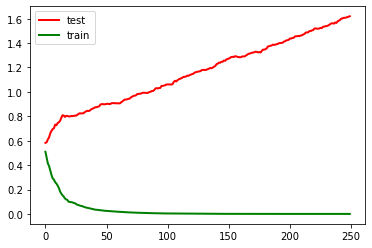

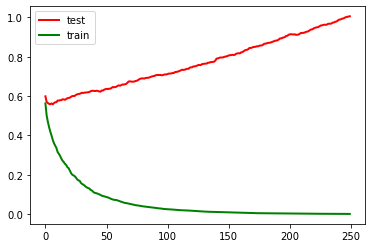

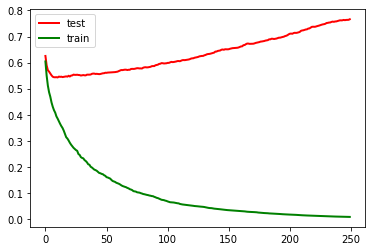

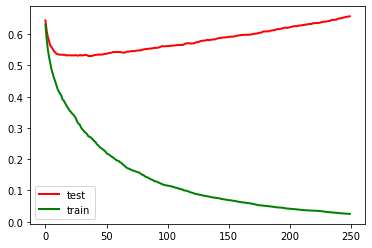

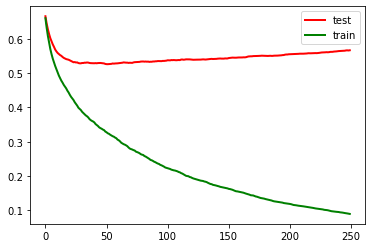

In [4]:
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]

for i in learning_rate:
    model = GradientBoostingClassifier(learning_rate = i, n_estimators=250, verbose=False, random_state=241)
    model.fit(X_train, y_train)
    scores_train = []
    for x in model.staged_decision_function(X_train):
        scores_train.append(log_loss(y_train, [1.0 / (1.0 + math.exp(-i)) for i in x]))
    scores_test = []
    if i == 0.2:
        scores_add={}
        count=0
        for x in model.staged_decision_function(X_test):
            log_loss_sigm = log_loss(y_test, [1.0 / (1.0 + math.exp(-i)) for i in x])
            scores_test.append(log_loss_sigm)
            count+=1
            scores_add[count]=log_loss_sigm
    else:
        for x in model.staged_decision_function(X_test):
            log_loss_sigm = log_loss(y_test, [1.0 / (1.0 + math.exp(-i)) for i in x])
            scores_test.append(log_loss_sigm)
        
    plt.figure()
    plt.plot(scores_test, 'r', linewidth=2)
    plt.plot(scores_train, 'g', linewidth=2)
    plt.legend(['test', 'train'])    

 Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

**overfitting**

Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [5]:
scores_add
sorted_scores_add = {}

sorted_keys = sorted(scores_add, key=scores_add.get)
for w in sorted_keys:
    sorted_scores_add[w] = scores_add[w]

sorted_scores_add 

{37: 0.5301645204906471,
 39: 0.5304015466819089,
 38: 0.5304517952627301,
 36: 0.530485620894695,
 28: 0.5315205548918214,
 27: 0.5316190377859967,
 18: 0.5319491027486606,
 40: 0.5319713162231164,
 25: 0.5320688304902977,
 22: 0.5321292404919267,
 24: 0.5321364516026601,
 31: 0.5322969616176372,
 20: 0.5323097278464514,
 23: 0.5323336458788014,
 30: 0.5323861247369267,
 32: 0.5324318559617608,
 21: 0.5324819133507445,
 19: 0.5325951966608586,
 35: 0.5326867101603974,
 26: 0.5328616639175239,
 41: 0.5330837759627751,
 33: 0.5331971336211693,
 29: 0.5332204016163479,
 42: 0.5335605128855797,
 16: 0.5340335009618385,
 34: 0.5340457283375767,
 15: 0.5340773602375849,
 17: 0.5341327854887927,
 13: 0.5341971667190248,
 43: 0.534300213140112,
 14: 0.5344814545808215,
 45: 0.5345139183130525,
 47: 0.5345434779245442,
 44: 0.5347410096412869,
 46: 0.5348608312033613,
 12: 0.5350036844397639,
 48: 0.5354379191901939,
 11: 0.5359827238623724,
 49: 0.5362962181483465,
 50: 0.5372813773506968,
 5

. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [6]:
model = RandomForestClassifier(n_estimators=37, random_state=241)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)
test_loss

0.5410941951182815